# Use of Clark & Hensley 2019 GALFA-HI-based Stokes parameter maps


This notebook demonstrates how to access the GALFA-HI-based data released with Clark & Hensley 2019. 

Data are here: https://doi.org/10.7910/DVN/P41KDE

Paper is here: https://ui.adsabs.harvard.edu/abs/2019ApJ...887..136C/abstract

More details on the data products can be found on the Harvard Dataverse page. Use of these data must cite Clark & Hensley 2019.

Note that the GALFA-HI maps are based off of the publicly available HI line emission and RHT data products released here: https://ui.adsabs.harvard.edu/abs/2018ApJS..234....2P/abstract

In [1]:
import numpy as np
import healpy as hp
import h5py
import matplotlib.pyplot as plt
%matplotlib inline

Change the following paths as needed. The following demonstrates the use of the 3D Stokes maps (I(v), Q(v), U(v)). Scroll down for use of the velocity-integrated IQU maps. 

In [2]:
root = "../data/"
I_v_fn = root + "I_v_GALFAHI_Kkms.h5"
Q_v_fn = root + "Q_v_GALFAHI_Kkms.h5"
U_v_fn = root + "U_v_GALFAHI_Kkms.h5"

The data are stored as healpix maps, one for each velocity channel.

The hdf5 dataset names are `HI` for total intensity I(v), `QHI_v` for Q(v), and `UHI_v` for U(v).

Each dataset has size n_pixels x n_channels, where n_pixels = 12 x 2048^2, and n_channels = 21.

For convenience, velocity bin information is stored in this github repo in the `data` folder.

In [4]:
chan_centers = np.load(root + "GALFAHI_centervels.npy")

In [5]:
# Open the I map for velocity slice 10 
vindx = 10
with h5py.File(I_v_fn, 'r') as f:
    Islice = f['HI'][:, vindx]
    
v_slice = chan_centers[vindx]

Recall that GALFA-HI is a survey with Arecibo and covers about 1/3 of the sky.

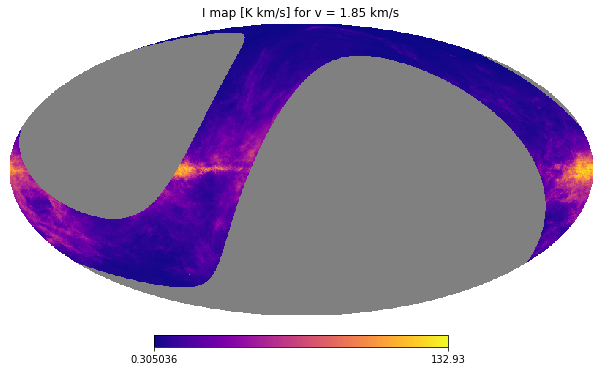

In [7]:
hp.mollview(Islice, cmap="plasma", title="I map [K km/s] for v = {} km/s".format(np.round(v_slice, 2)));

Text(0, 0.5, 'HI-based Stokes parameters [K km/s]')

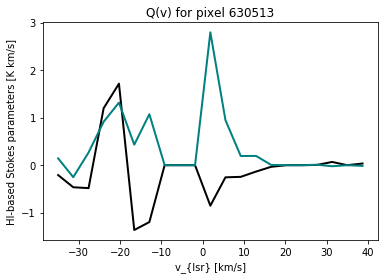

In [8]:
# Plot the Q and U spectra for all velocities, for a random pixel. 
# Note that not all velocities have HI-based Stokes parameters (see Clark & Hensley section 3.2)

allpix = np.arange(12*2048**2)
footprintpix = allpix[np.isnan(Islice)==False]
pixindx = footprintpix[np.random.randint(len(footprintpix))]
with h5py.File(Q_v_fn, 'r') as f:
    Qspec = f['QHI_v'][pixindx, :]
with h5py.File(U_v_fn, 'r') as f:
    Uspec = f['UHI_v'][pixindx, :]

plt.plot(chan_centers, Qspec, color="black", lw=2)
plt.plot(chan_centers, Uspec, color="teal", lw=2)
plt.title("Q(v) for pixel {}".format(pixindx))
plt.xlabel("v_{lsr} [km/s]")
plt.ylabel("HI-based Stokes parameters [K km/s]")

We also provide velocity-integrated I, Q, U maps. These are stored as standard healpix polarization FITS files.

In [14]:
IQU_fn = root + "IQU_integrated_GALFAHI_Kkms.fits"

IHI, QHI, UHI = hp.read_map(IQU_fn, field=(0,1,2));

NSIDE = 2048
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


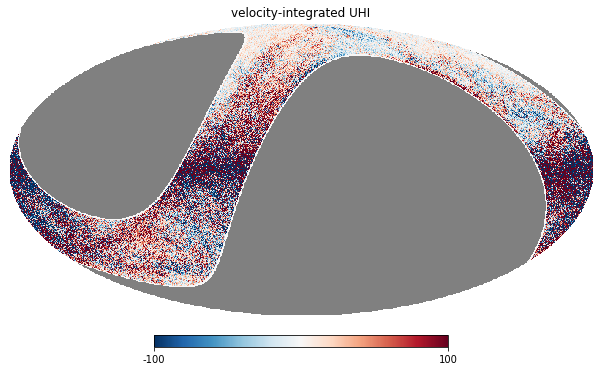

In [16]:
hp.mollview(UHI, cmap="RdBu_r", min=-100, max=100, title="velocity-integrated UHI");